# Predicting diamonds price

The global diamond market size was valued at USD 87.31 billion in 2018 and is predicted to grow (according to a publication of [GrandViewResearch](https://www.grandviewresearch.com/industry-analysis/diamond-market)). Diamonds are mainly used in the jewelry industry.

Wikipedia [explains](https://en.wikipedia.org/wiki/Diamond) that most natural diamonds ages between 1 billion and 3.5 billion years. Most were formed at depths between 150 and 250 kilometers in the Earth's mantle, although a few have come from as deep as 800 kilometers. Synthetic diamonds can be grown from high-purity carbon under high pressures and temperatures or hydrocarbon gas by chemical vapor deposition. Imitation diamonds can also be made out of materials such as cubic zirconia and silicon carbide.

The diamond industry has developed and applied technical specifications concerning stones' characteristics. These include "cut", "color", dimensions, etc. This Notebook explores the "diamonds" dataset (as provided by the Seaborn library) and proposes an algorithm for predicting their price. The assumption is that diamonds' price very much depends on stones' size, purity, and shape. The work is organized into several chapters.

### Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## I. Load `diamonds` dataset

The dataset is loaded by calling its name in `load_dataset()` over Seaborn. It is stored in `diamonds` variable.

In [4]:
diamonds = sns.load_dataset("diamonds")

## II. Exploratory Data Analysis

Diamonds dataset has 53940 rows (samples) and 10 columns (features).

In [5]:
diamonds.shape

(53940, 10)

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Diamonds' carat

The first column "carat" is a weight measure for a diamond's size. Diamonds heavier more than one carat are expressed in carats and decimals. A 1.08 carat stone would be described as 'one point oh eight carats.' The plot under the table shows that most of the stones weigh between 0.2 and 2.5 carats; only a tiny number are larger. Carat's mean and median are displayed either and are explored later.

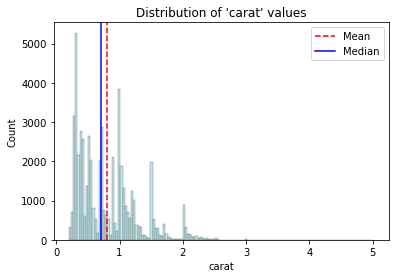

In [7]:
sns.histplot(diamonds["carat"], color = "powderblue")

mean = diamonds["carat"].mean()
median = diamonds["carat"].median()
plt.axvline(mean, color = 'r', linestyle = '--')
plt.axvline(median, color = 'b', linestyle = '-')
plt.legend({'Mean':mean,'Median':median})

plt.title("Distribution of 'carat' values")
plt.show()

#### Diamonds' cut

Diamonds' "cut" shows how well a diamond's facets [interact with light](https://4cs.gia.edu/en-us/diamond-cut/). Precise artistry and workmanship are required to fashion a stone so its proportions, symmetry, and polish deliver the magnificent return of light only possible in a diamond. Diamonds' cut is categorized as "Ideal", "Premium", "Very Good", "Good", and "Fair". Most are "Ideal"; around 14000 have "Premium" cut, and another 13000 - "Very Good".

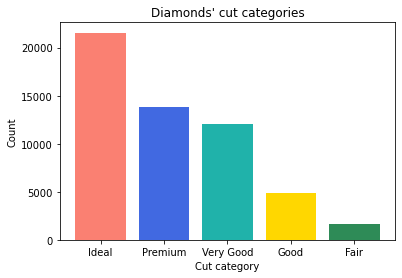

In [8]:
plt.bar((diamonds.groupby("cut").size()).index, diamonds.groupby("cut").size(),
       color = ["salmon", "royalblue", "lightseagreen", "gold", "seagreen"])
plt.xlabel("Cut category")
plt.ylabel("Count")
plt.title("Diamonds' cut categories")
plt.show()

#### Diamonds' color

Diamond "color" actually means lack of color. A chemically pure and structurally perfect diamond has no hue, like a drop of pure water, and consequently, a higher value. It is explained [here](https://4cs.gia.edu/en-us/diamond-color/) that the D-to-Z diamond color-grading system measures the degree of colorlessness by comparing a stone under controlled lighting and precise viewing condition. The plot below shows that the dataset has D-to-J color diamonds, as those falling into the "G" category outnumber the others.

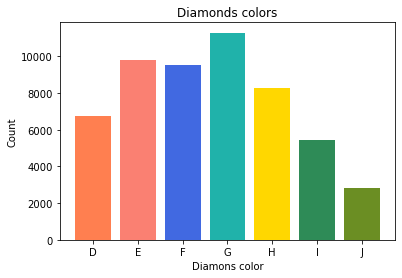

In [9]:
plt.bar((diamonds.groupby("color").size()).index, diamonds.groupby("color").size(),
       color = ["coral", "salmon", "royalblue", "lightseagreen", "gold", "seagreen", "olivedrab"])
plt.xlabel("Diamons color")
plt.ylabel("Count")
plt.title("Diamonds colors")
plt.show()

#### Diamonds' clarity

Diamond clarity refers to the absence of inclusions and blemishes, which result from their exposure to tremendous heat and pressure deep in the earth. Evaluating diamond clarity involves determining the number, size, relief, nature, and position of inclusions and blemishes, as well as how these affect the overall appearance of the stone. The diamond clarity scale has several categories:

-	Flawless (FL) No inclusions and no blemishes visible under 10x magnification;

-	Internally Flawless (IF) means no inclusions visible under 10x magnification;

-	Very, Very Slightly Included (VVS1 and VVS2) stands for inclusions so slight they are difficult for a skilled grader to see under 10x magnification;

-	Very Slightly Included (VS1 and VS2) is a mark for diamonds where inclusions are observed with effort under 10x magnification but can be characterized as minor;

-	Slightly Included (SI1 and SI2) are inclusions noticeable under 10x magnification;

-	Included (I1, I2, and I3) are for inclusions, which are obvious under 10x magnification which may affect transparency and brilliance.

The dataset has diamonds of all clarity types save the first one. The most common are those with SI1 and VS2 clarity.

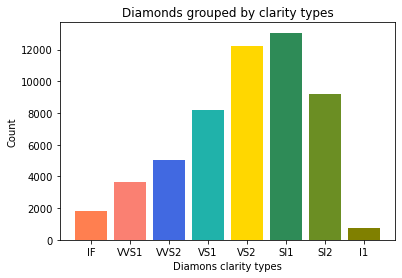

In [10]:
plt.bar((diamonds.groupby("clarity").size()).index, diamonds.groupby("clarity").size(),
       color= ["coral", "salmon", "royalblue", "lightseagreen", "gold", "seagreen", "olivedrab", "olive"])
plt.xlabel("Diamons clarity types")
plt.ylabel("Count")
plt.title("Diamonds grouped by clarity types")
plt.show()

#### Diamonds' depth

Diamonds' depth is the [distance from the table (this term is explained below) to the culet](https://www.brilliance.com/diamonds/ideal-depth-table-round-cut-diamonds), or point, of the diamond. When discussing depth in terms of cut quality, it is described in percentages. Depth is deemed acceptable within a certain range, with any value between 56.5 and 65 percent considered good. However, the ideal depth is between 62.9 and 59.5 percent. 

The depth of the stones in the dataset range between 55.0 and 69.0% but their mean and median values are somewhere around 62.0%.

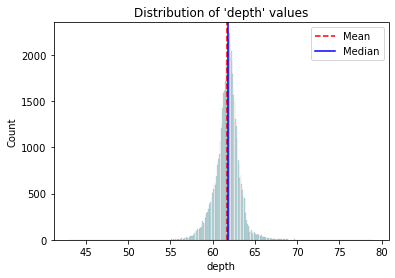

In [11]:
sns.histplot(diamonds["depth"], color = "powderblue")

mean = diamonds["depth"].mean()
median = diamonds["depth"].median()
plt.axvline(mean, color = "r", linestyle = "--")
plt.axvline(median, color = "b", linestyle = "-")
plt.legend({"Mean": mean, "Median": median})

plt.title("Distribution of 'depth' values")
plt.show()

#### Diamonds' table

Experts on diamonds [explain that](https://www.diamonds.pro/education/diamond-depth-and-table/) a diamond's table is the flat facet on its surface — the large, flat surface facet that can be seen when one looks at the diamond from above. As the largest facet on a diamond, the table plays a major role in determining how brilliant (sparkly) the diamond is. The table lets light into the diamond and refracts it towards the facets on the top and sides, creating its unique, sparkly appearance. The size of the table is one of the most important factors in the appearance of any diamond. A large table not only lets light into the diamond but also disperses light onto the other facets of the diamond to create a beautiful sparkle. The plot below shows that the table of the stones in the dataset ranges between 50.0% and 70.0%. Neither their carat nor their color does play a significant role in the table's size.

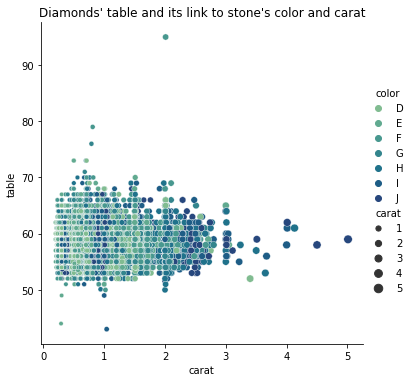

In [12]:
sns.relplot(x = "carat", y = "table", data = diamonds,
           size = "carat", hue = "color", palette = "crest")
plt.title("Diamonds' table and its link to stone's color and carat")
plt.show()

#### Diamonds' price

The diamond price is determined by its quality and characteristics. The most important one is the stone's weight (carat). The figure below illustrates the regression line of diamonds' price taking into account their weight. There is a steady upward trend: the price is higher for larger diamonds.

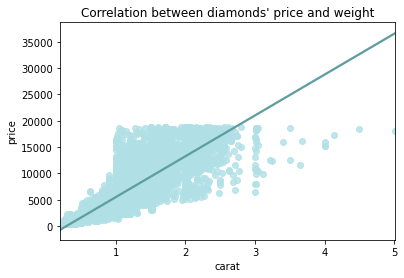

In [13]:
sns.regplot(x = "carat", y = "price", data = diamonds, 
            scatter_kws = {"color": "powderblue"}, line_kws = {"color": "cadetblue"})
plt.title("Correlation between diamonds' price and weight")
plt.show()

#### Diamonds' dimensions

The last three features - "x", "y", and "z" provide information about diamond dimensions. As explained [here] (http://www.lumeradiamonds.com/blog/Loose-Diamond-Diameter), the size of a diamond is measured in millimeters, using three measurements (the length, width, and depth). Length and width refer to measurements across the top of the diamond. In round diamonds, these two measurements will be very close since a circle has one diameter round. The two measurements will diverge from each other depending on how elongated the shape is. The third measurement (depth) refers to the distance from the top of the diamond surface to the bottom point (or culet). The third measure is important for evaluating cut in a diamond, but is not a good indicator of a diamond's apparent size, since the depth is usually hidden in the ring setting.

The 3D plot below shows that in terms of their dimensions, the diamonds are grouped into a single cluster. Measurements differ only in a minor number of stones. 

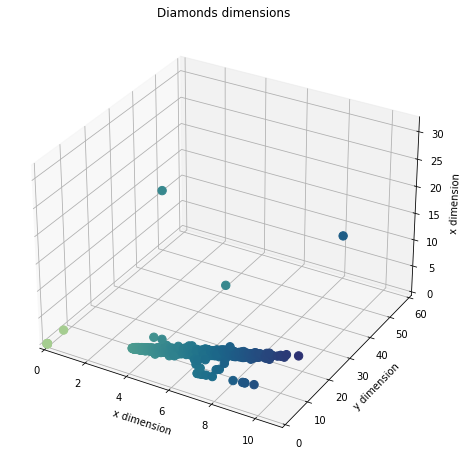

In [14]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.set_xlim3d(0, 11)
ax.set_ylim3d(0, 60)
ax.set_zlim3d(0, 32)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("crest", 256).as_hex())

sc = ax.scatter(diamonds["x"], diamonds["y"], diamonds["z"], s = 70,
                c = diamonds["x"], marker = "o", cmap = cmap, alpha = 1) 
ax.set_xlabel("x dimension")
ax.set_ylabel("y dimension")
ax.set_zlabel("x dimension")

plt.title("Diamonds dimensions")
plt.show()

This observation is confirmed by the values' distributions as displayed below. "x" and "y" dimensions are almost identical; values in "z" follow the same pattern but are slightly smaller. It should be noted that the "x" axis is limited to 15 mm for improving visualization.

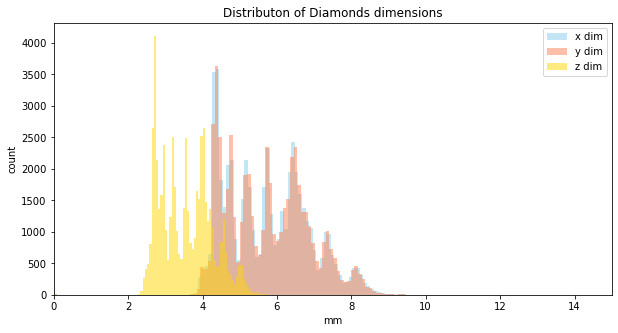

In [15]:
# Normalize
kwargs = dict(alpha = 0.5, bins = "fd")

# Plot
plt.figure(figsize = (10, 5))
plt.hist(diamonds["x"], **kwargs, color = "skyblue", label = "x dim")
plt.hist(diamonds["y"], **kwargs, color = "coral", label = "y dim")
plt.hist(diamonds["z"], **kwargs, color = "gold", label = "z dim")
plt.gca().set(title = "Distributon of Diamonds dimensions", ylabel = "count", xlabel = "mm")
plt.xlim(0,15)
plt.legend()
plt.show()

### II.1. Check for missing values and data types

There are no missing values in the dataset. Entries in three columns are *strings*; numeric values are both of *float64* and *int64* types. A Machine Learning algorithm will expect only numeric data types. Therefore, the dataset should undergo some pre-processing. 

In [16]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### II.2. Data statistics

*Mean*, *standard deviation*, and *quartile distribution* is displayed below. They are informative but the data would be easier for comprehending if displayed on plots. Therefore, columns with numeric values are exported in a new variable as a pre-plotting step.

In [17]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [18]:
diamonds_numeric = diamonds[["carat", "depth", "table", "price", "x", "y", "z"]]

Most diamonds weigh between 0.2 and 1.0 carats. There are outliers but these perhaps are the larger stones. Major share has a depth of around 62 - 64%. The table is slightly below 60%. Most stones cost up to 5000 dollars but the price of the most expensive ones goes up to 19 000 dollars. Most stones' dimensions are within the same range but the average measurement differs from 0.70 to 1.14 mm.

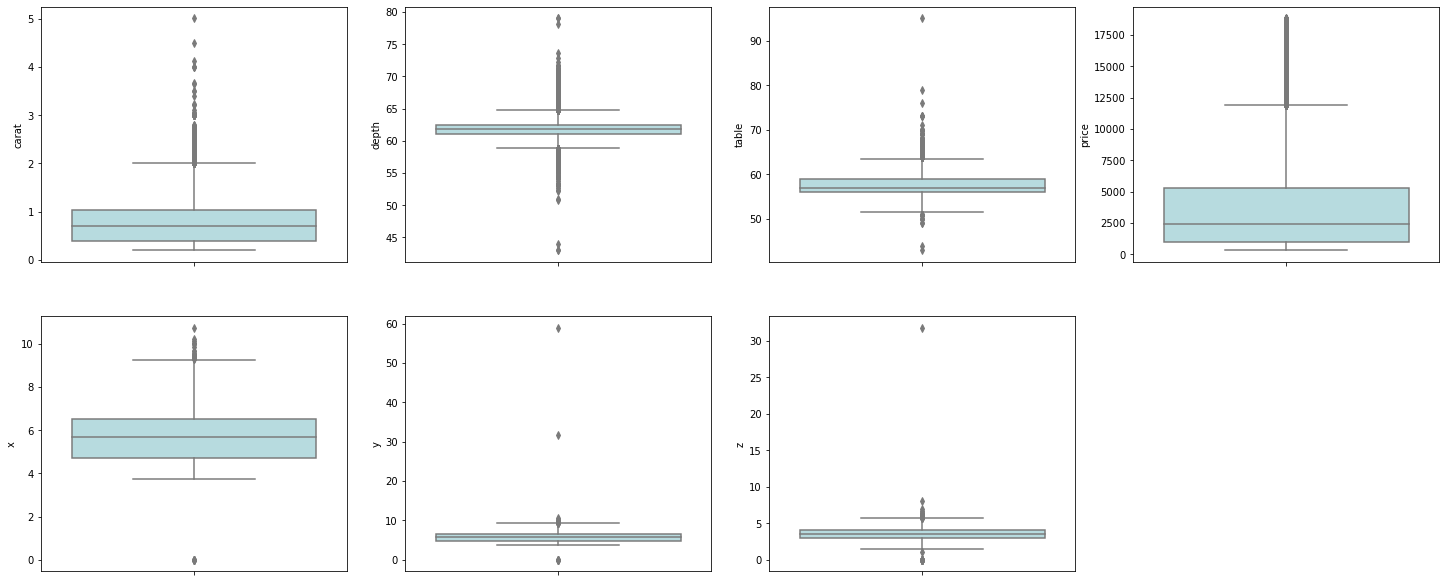

In [19]:
# Display boxplots per numeric feature
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in diamonds_numeric.items():
    sns.boxplot(y = k, data = diamonds_numeric, ax = axs[idx], color = "powderblue")
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

The plots below show how diamonds' price is linked to their weight, color, and cut. Heavier stones with better cuts are more expensive. Cheaper is diamonds of color "D", "E", and "F", whereas the other costs more.

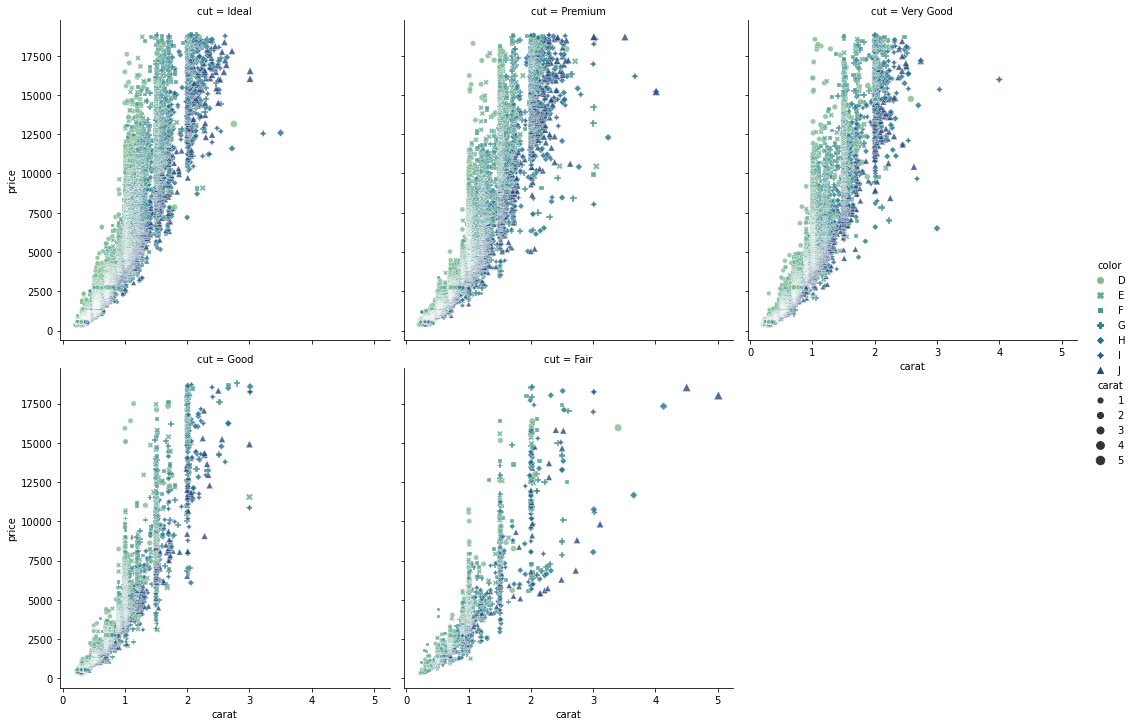

In [20]:
sns.relplot(x = "carat", y = "price", data = diamonds,
           size = "carat", hue = "color", style = "color", palette = "crest",
           alpha = 0.8, col = "cut", col_wrap = 3)
plt.show()

#### Encoding categorical variables

To examine the correlation between all features and to prepare the dataset for modeling, categorical variables are encoded. This is performed with `scikit learn` class `LabelEncoder()`. The latter is instantiated. Thereafter, the encoder transforms the features into a numeric type.

In [21]:
label_encoder = LabelEncoder()

In [22]:
diamonds["cut"] = label_encoder.fit_transform(diamonds["cut"])

In [23]:
diamonds["color"] = label_encoder.fit_transform(diamonds["color"])

In [24]:
diamonds["clarity"] = label_encoder.fit_transform(diamonds["clarity"])

A brief check shows the encoding was successful.

In [25]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


#### Explore correlation

There is a strong positive (linear) correlation between "price", "carat" and "dimensions" . It seems stones' "cut", "color", and "clarity" play minor role for setting a diamond's price.

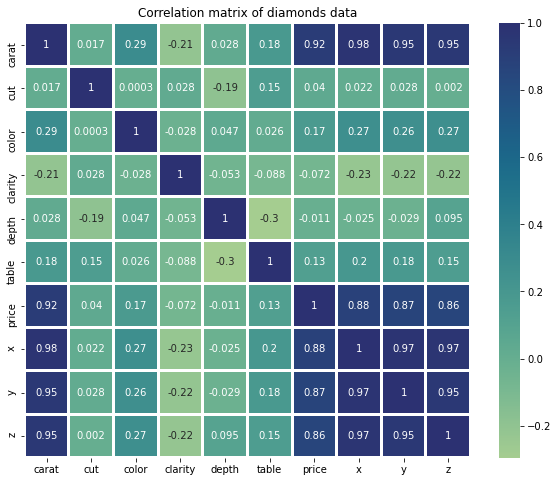

In [26]:
plt.figure(figsize = (10, 8))
sns.heatmap(diamonds.corr(),
           annot = True,
           cmap = "crest",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of diamonds data")
plt.show()

## III. Data pre-processing

### III.1. Scale features

All features should be scaled before being fed to the modeling algorithm. Before that, however, the target column ("price") - the one that is going to be predicted, and features should be separated and stored in new variables. This is performed with the function below.

In [27]:
def separate_features_and_target(dataset, target):
    """
    Function: separates features from target.
    
    Parameters: dataset and a target column.
    
    Returns: tuple of features and target
    """
    
    features = dataset.drop([target], axis = 1)
    target = dataset[target]
    
    return (features, target)

In [28]:
(features, target) = separate_features_and_target(diamonds, "price")

Scaling is performed with `scikit learn` class `MinMaxScaler()`. It scales and translates each feature individually such that it is in the given range, e.g. between zero and one.

In [29]:
scaler = MinMaxScaler()

In [30]:
features_scaled = scaler.fit_transform(features)

A brief check confirms the features were scaled properly.

In [31]:
features_scaled.min(), features_scaled.max()

(0.0, 1.0)

### III.2. Split data into training and testing set

The dataset is split into training and testing sets. The former is fed to the modeling algorithm, and the latter is used for testing the best-performing one. A validation set could also be held out but the best Regressor is chosen after "grid search" with cross-validation, which makes this step redundant. Both features and target are split with `scikit learn` function `train_test_split()`, which split arrays or matrices into random train and test subsets. Test size could be adjusted. It could be 30%, 20%, or less out of the dataset; the test size for this exercise is set to 10% since it is better to keep more data in the training subset.

In [32]:
features_train, features_test, target_train, target_test = train_test_split(features_scaled,
                            target, test_size = 0.1, random_state = 42)

A brief check confirms the data were properly split: 48546 samples for training, and 5394 - for testing.

In [33]:
features_train.shape, target_train.shape, features_test.shape,  target_test.shape

((48546, 9), (48546,), (5394, 9), (5394,))

## IV. Modelling

### IV.1. Predicting diamonds' price with Linear Regression

The `LinearRegression()` algorithm fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. It has almost no hyper-parameters for tuning. For this reason, it is instantiated with its default settings.

In [34]:
linear_regression = LinearRegression()

Training data - both features and labels, are passed to it.

In [35]:
linear_regression.fit(features_train, target_train)

LinearRegression()

After seeing the data, the algorithm could say which are the most important features. This is performed by calling the `coef_` attribute. Higher values indicate more important features. The first column ("carat") holds information important for predicting the target. Diamonds' "clarity" and "y" dimension are almost equally important, whereas the others are less informative.

In [36]:
linear_regression.coef_

array([ 52898.40316771,    276.69101792,  -1602.41856959,   2005.21758091,
        -5624.63638677,  -4885.4656712 , -12722.31131945,   2092.50094652,
          282.3593738 ])

Applying `predict()` over the model with testing features returns their predicted price.

In [37]:
predictions_test = linear_regression.predict(features_test)

Several metrics are used for measuring the performance of regression models. Mean Squared Error (MSE), its Rooted value (RMSE), and R-squared are the most widely used. Mean Squared Error measures how close a fitted line is to data points. The squaring is done so negative values do not cancel positive values. The smaller the MSE, the closer the fit is to the data. RMSE is just the square root of the MSE. It has the same units as the quantity plotted on the vertical axis. R-squared is a statistical measure of how close the data are to the fitted regression line. It is defined as "the percentage of the response variable variation that is explained by a linear model" and is always between 0 and 100%. R-squared of 0% means the model does not explain the variability of the response data around its mean. R-squared values of 100% mean that the model explains all variability of the response data around its mean.

In [38]:
print("Mean Squared Error with Linear Regression", mean_squared_error(target_test, predictions_test))
print("Rooted Mean Squared Error with Linear Regression", np.sqrt(mean_squared_error(target_test, predictions_test)))
print("R-squared with Linear Regression", r2_score(target_test, predictions_test))

Mean Squared Error with Linear Regression 1868433.227779351
Rooted Mean Squared Error with Linear Regression 1366.906444413571
R-squared with Linear Regression 0.8842823360878201


Rooted Mean Squared Error of 1366.90 suggests that a predicted price differs from the real one with USD 1366.90. This figure is two or three times less than the standard deviation of prices for all data but it should be borne in mind that most diamonds cost up to around USD 5000. So, a price differing with USD 1366.00 from the real one is not a good prediction.

`LinearRegression()` is only one of the many regression algorithms, which could model the data. Some of them are explored in the next sub-chapter.

### IV.2. Search for best regression estimator

Instantiating each algorithm, searching for its best hyper-parameters, fitting training data to it, predicting the target, and its evaluation would mean repeating similar operations numerous times. To spare redundant code lines, regression estimators and a range of hyper-parameters for grid-search are stored in a dictionary. 

`GridSearchCV()` is an algorithm for finding and selecting the best hyperparameters. It needs a dictionary with a range for each hyperparameter for preliminary training and scoring. This dictionary ("params_grid") is passed to `GridSearchCV()` along with an estimator (in this case instantiated in "pipe"), and the number of folders the function is going to use for model training and validation.

The code line below instantiates the pipeline with one of the chosen estimators (Support Vector Regressor). Thereafter, "params_grid" gets the estimators and lists of hyper-parameters with values within a given range for searching for the best-performing one. This approach was proposed by a StackOverflow [user](https://stackoverflow.com/questions/51629153/more-than-one-estimator-in-gridsearchcvsklearn). 

In [39]:
pipe = Pipeline(steps = [("estimator", SVR())])

In [40]:
params_grid = [{
            "estimator": [SVR()],
            "estimator__C": [0.01, 0.1, 1.0, 10],
            "estimator__gamma": [0.001, 0.0001]
            },
            {
            "estimator": [ElasticNet()],
            "estimator__alpha": [0.5, 0.8, 1.0],
            "estimator__l1_ratio": [0.1, 0.5, 1.0]
            },
            {
            "estimator": [DecisionTreeRegressor()],
            "estimator__max_depth": [5, 10, 15]
            },
            {
            "estimator": [RandomForestRegressor()],
            "estimator__n_estimators": [20, 25, 30, 35],
            "estimator__max_depth": [5, 10, 15]
            }]

Thereafter, `GridSearchCV()` is instantiated. It gets the initial estimator, the dictionary with all estimators and their hyper-parameters, and the number of folders for cross-validation. Learned combinations receive training features and target to compute the best-performing one.

In [41]:
gs = GridSearchCV(pipe, params_grid, cv = 5)

In [42]:
gs.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('estimator', SVR())]),
             param_grid=[{'estimator': [SVR()],
                          'estimator__C': [0.01, 0.1, 1.0, 10],
                          'estimator__gamma': [0.001, 0.0001]},
                         {'estimator': [ElasticNet()],
                          'estimator__alpha': [0.5, 0.8, 1.0],
                          'estimator__l1_ratio': [0.1, 0.5, 1.0]},
                         {'estimator': [DecisionTreeRegressor()],
                          'estimator__max_depth': [5, 10, 15]},
                         {'estimator': [RandomForestRegressor(max_depth=15,
                                                              n_estimators=25)],
                          'estimator__max_depth': [5, 10, 15],
                          'estimator__n_estimators': [20, 25, 30, 35]}])

Applying `cv_results_` over the searched space returns a dictionary with models' parameters and their values. "Mean_test_score" shows the average R-squared each model got after cross-validation on all 5 folds.

In [43]:
gs.cv_results_

{'mean_fit_time': array([1.45978419e+02, 9.95415979e+01, 1.35810076e+02, 9.91093958e+01,
        1.24310021e+02, 9.79753890e+01, 1.51065758e+02, 1.23074484e+02,
        2.06932545e-02, 1.99464321e-02, 1.78323555e-01, 1.53591633e-02,
        1.59608364e-02, 1.66347218e-01, 1.51598930e-02, 1.51633263e-02,
        1.41621637e-01, 7.68034935e-02, 1.14890385e-01, 1.82708025e-01,
        8.32362032e-01, 1.40902424e+00, 1.50720987e+00, 1.62353687e+00,
        2.17613130e+00, 2.47935753e+00, 2.64789042e+00, 2.92358656e+00,
        2.45409012e+00, 2.81569805e+00, 3.43321261e+00, 4.03552032e+00]),
 'std_fit_time': array([2.82548867e+01, 6.12495845e-01, 1.88730638e+01, 8.89248893e-01,
        2.24921847e+01, 8.93014833e-01, 2.87364272e+01, 3.15579137e+00,
        1.41372022e-03, 8.92656871e-04, 7.33955136e-03, 7.97510468e-04,
        1.54466670e-03, 1.29755934e-02, 7.46914830e-04, 9.76054373e-04,
        7.43670696e-03, 1.25925591e-02, 5.54818716e-03, 3.53051345e-03,
        2.94210266e-02, 3.536

`best_estimator_` returns the best performing algorithm, along with its best combination of hyper-parameters. In this case, `RandomForestRegressor()` with 25 trees, each having 15 levels, best predicts diamonds' price. This combination is set to the regressor and stored as a variable.

In [44]:
gs.best_estimator_

Pipeline(steps=[('estimator',
                 RandomForestRegressor(max_depth=15, n_estimators=25))])

### IV.3. Predicting diamonds' price with Random Forest Regressor

In [45]:
random_forest_regressor = RandomForestRegressor(max_depth = 15, n_estimators = 25)

`fit()`, `predict()`, and model evaluation is wrapped in a function. Its output proves that Random Forest Regressor predicts diamonds' price much better than the simple Linear Regression. A deviation of USD 276.41 is not too bad; R-squared reached almost 100%.

In [46]:
def regression_task(estimator, features, target):
    """
    Function: "fit", "predict" and "score" values of an estimator.
    
    Parameters: estimator, features (X) and target (y).
    
    Returns: model's performance measured as MSE, RMSE and R-squared.
    """
    estimator.fit(features, target)
    predictions = estimator.predict(features)
    
    print(f"MSE: {mean_squared_error(target, predictions)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(target, predictions))}")
    print(f"R-squared: {r2_score(target, predictions)}")

In [47]:
regression_task(random_forest_regressor, features_test, target_test)

MSE: 72691.99310261656
RMSE: 269.6145268760876
R-squared: 0.995497967226288


Another apporach to evaluate regression model's performance is to compute residuals, i.e., the difference between real and predicted values and how they are spread on the plot. First, real diamond prices are plotted against predicted ones. It could be seen on the plot below that they overlap.

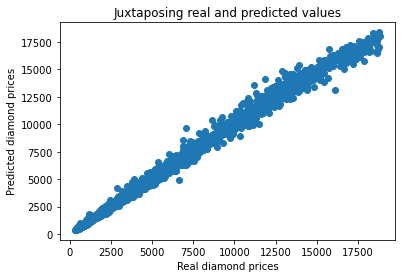

In [48]:
plt.scatter(target_test, random_forest_regressor.predict(features_test))
plt.xlabel("Real diamond prices")
plt.ylabel("Predicted diamond prices")
plt.title("Juxtaposing real and predicted values")
plt.show()

The plot below shows what the model returns. It shows where the residuals (computed as the difference between predicted and real values) are against predicted prices.

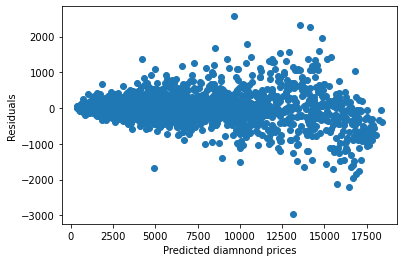

In [49]:
plt.scatter(random_forest_regressor.predict(features_test), random_forest_regressor.predict(features_test) - target_test)
plt.xlabel("Predicted diamnond prices")
plt.ylabel("Residuals")
plt.show()

Most dots (prices) are grouped around the zero of "y" axis. Farther dots represent predicted prices which differ more from the real ones. Distant values indicate that the model couldn't predict all targets.

## Conclusion

Placing various estimators along with a range of values for their hyper-parameters turned out to be a good solution for finding an algorithm that best predicts a target variable. The Seaborn Diamonds was an appropriate dataset for this exercise - it has sufficient samples both for training and testing, and the target variable very much depends on its features.